# Data Analysis homework 3: Factor Analysis

by Skander Chouchene

In [1]:
# import necessary libraries
import pandas as pd # pandas
import seaborn as sns # seaborn package to generate nice plots
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy
import factor_analyzer as fa # factor analyzer package

In [2]:
# read data
data=pd.read_csv('tn_stock_data_2018.csv')
# convert date from string to datetime type
data.date=pd.to_datetime(data.date,format='%d/%m/%y')

In [3]:
# show top observations from the data
data.head()

,date,C_GR_RLC,company_code,company,ref_price,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,I
0,2018-01-02,11,725001,ADWYA,5.35,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.50,NaN
1,2018-01-02,11,340005,AMEN BANK,24.35,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.00,NaN
2,2018-01-02,11,730001,ARTES,6.27,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.05,NaN
3,2018-01-02,11,714001,ASSAD,9.00,9.00,0.00,0.00,9.00,0.00,0.00,0,0,NaN,NaN
4,2018-01-02,11,360035,ATB,4.22,4.22,4.15,4.18,4.18,4.15,4.18,3705,7,15465.90,NaN


In [4]:
# calculate daily return for every company
data['currReturn']=data.groupby(['company'])['close'].pct_change()

In [5]:
data=data.drop("I",axis=1)
data=data.replace([np.inf, -np.inf], np.nan)

In [6]:
ret_data=data.pivot(index='date',columns='company',values='currReturn').dropna()

In [7]:
ret_data.head()

company,ADWYA,AETECH,AIR LIQUDE TSIE,ALKIMIA,AMEN BANK,AMI DA 1/4 110817,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,...,TELNET HOLDING,TPR,TUNINVEST-SICAR,TUNIS RE,TUNISAIR,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,-0.007421,0.039216,0.000000,0.000000,-0.000417,-0.138249,-0.025424,0.024590,-0.030303,-0.001111,...,0.013652,-0.022989,0.000000,-0.017857,-0.023256,0.004082,0.0,0.004089,0.019108,-0.002692
2018-01-04,0.037383,0.037736,-0.011236,-0.029989,-0.003752,0.000000,0.000000,0.001600,-0.045000,0.011123,...,0.026936,-0.032353,0.000000,0.030303,0.023810,0.056911,0.0,-0.004525,-0.002500,-0.029690
2018-01-05,0.005405,0.018182,0.002273,-0.044929,0.003347,0.000000,0.000000,0.000000,-0.018325,0.012101,...,0.013115,0.000000,0.029231,-0.012941,-0.023256,0.034615,0.0,0.000000,0.002506,-0.001391
2018-01-08,-0.014337,0.035714,0.000000,-0.023288,0.000000,0.005348,0.000000,-0.025559,0.058667,0.016304,...,0.009709,0.024316,0.000000,-0.021454,-0.023810,-0.014870,0.0,0.020000,0.025000,0.029248
2018-01-09,0.000000,0.000000,0.000000,0.000000,-0.000417,0.058511,0.000000,0.008197,-0.023929,0.014973,...,-0.012821,0.008902,-0.044843,-0.023143,0.000000,-0.026415,0.0,-0.001783,0.000000,-0.009472



### Factor Analysis

#### Question: Perform the factor analysis on the returns for the 84 stocks in the provided dataset. It is important that you try to interpret the results of the FA. You may want to try running the analysis for various combinations of industries and analyze the results you get. You can find the industries for all the stocks in Tunisia Stock Exchange in https://www.ilboursa.com/marches/secteurs.aspx

You will need to install factor-analyzer (https://pypi.org/project/factor-analyzer/) to perform the factor analysis exercise. You can find a variety of examples in the documentation of the package : https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

You may want to take a look at the following link regarding how to choose the factor in the FA: https://www.theanalysisfactor.com/factor-analysis-how-many-factors/ </b>


# I/ general Factor Analysis

#### In this first section, we are going to perform a general Factor Analysis.


In [8]:
fact=fa.FactorAnalyzer(n_factors=5, rotation=None)
fact.fit(ret_data)
ev,v=fact.get_eigenvalues()

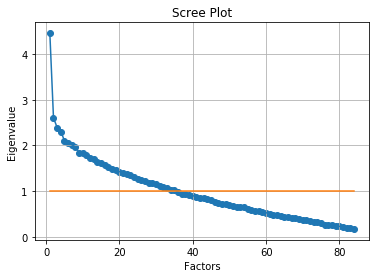

In [9]:
plt.scatter(range(1,ret_data.shape[1]+1),ev)
plt.plot(range(1,ret_data.shape[1]+1),ev)
plt.plot(range(1,ret_data.shape[1]+1),ev/ev) #the 1 eigenvalue line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [10]:
fact.get_factor_variance()

(array([3.7651882 , 1.75131075, 1.54264698, 1.42365058, 1.21628087]),
 array([0.04482367, 0.02084894, 0.01836484, 0.01694822, 0.01447953]),
 array([0.04482367, 0.06567261, 0.08403745, 0.10098567, 0.11546521]))

### => Interpretation:
#### The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.
#### As we can see, there is about 35 to 40 factors that determine the next returns, as they are greater than 1.  It means we need to choose only 35 factors (this isn't always a sufficien criterion). However, this factor analysis is not really helpful, as data differs throughout industries. And defining factors also differ.

# II/ Factor Analysis for banks

#### In this part, we will isolate bank data and perform factor analysis on it.

In [26]:
bank=ret_data[["BIAT","UIB","BH","BNA","AMEN BANK","UBCI","ATB"]]
fact.fit(bank)
ev,v= fact.get_eigenvalues()

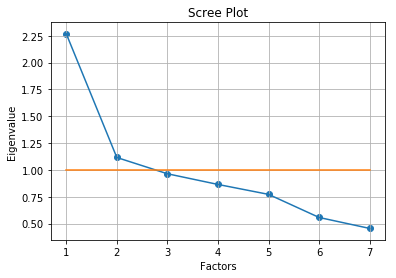

In [27]:
plt.scatter(range(1,bank.shape[1]+1),ev)
plt.plot(range(1,bank.shape[1]+1),ev)
plt.plot(range(1,bank.shape[1]+1),ev/ev) #the 1 eigenvalue line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [28]:
fact.get_factor_variance()

(array([1.80363433, 0.43938423, 0.20239898, 0.1052444 , 0.08761974]),
 array([0.25766205, 0.06276918, 0.02891414, 0.01503491, 0.01251711]),
 array([0.25766205, 0.32043122, 0.34934536, 0.36438028, 0.37689738]))

### => Observation:
#### There are only two factors whose eigenvalues are over 1, which means that the next returns for banks can be explained with only 2 underlying factors. However, two factors alone can't explain all the cumulative variance in the data. One of these factors has a higher eigenvalue than all of the others.

In [30]:
fact.loadings_

array([[ 0.67767779, -0.10064299,  0.05564156,  0.08555678, -0.15658348],
       [ 0.79689058, -0.01330124, -0.29704451, -0.05927194, -0.03060784],
       [ 0.66444112, -0.16535997,  0.25405563,  0.08555825,  0.11359127],
       [ 0.36294821,  0.1721605 ,  0.17034961, -0.26949554, -0.00597538],
       [ 0.3203393 ,  0.26987037, -0.10463099,  0.04854993,  0.20151932],
       [ 0.06164257,  0.5459102 ,  0.07909839,  0.09799748, -0.09231716],
       [ 0.1724009 ,  0.03531527, -0.01732346,  0.05002615, -0.00966125]])

### => Loadings explanation:
#### - The loadings matrix has the variables for rows (in our case the variables are companies), and the factors for columns. It shows the coefficient (or loading) for each factor in each variable, thus giving us the significance of the factor for that variable.
#### - Factor 1 has a high loading for most of the banks (except for UBCI). This is a very defining factor for banks. The 2nd factor is of a non-negligeable importance, yet it doesn't match the 1st one.
#### - We can conclude that one factor has most of the defining power for banks' next returns. This is also mirrored by its higher eigenvalue.

# III/ Factor Analysis between industries

#### In this final section, we are going to compare between several industries to understand the difference between them in terms of effecting factors.
#### We are going to perform factor analysis on 3 combinations of industries.: Banks vs pharmaceutical companies,  banks vs large food industrials, and pharmaceuticals vs large food industrials.

## 1) Pharmaceuticals vs Banks

In [34]:
bank_vs_pharma=ret_data[["BIAT","UIB","BH","ADWYA","SIPHAT","UNIMED"]]

In [35]:
fact.fit(bank_vs_pharma)
ev,v= fact.get_eigenvalues()

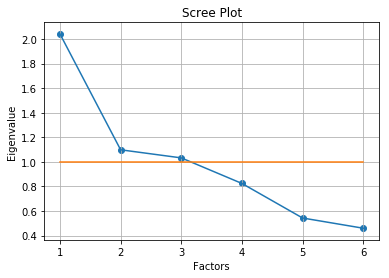

In [36]:
plt.scatter(range(1,bank_vs_pharma.shape[1]+1),ev)
plt.plot(range(1,bank_vs_pharma.shape[1]+1),ev)
plt.plot(range(1,bank_vs_pharma.shape[1]+1),ev/ev) #the 1 eigenvalue line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [37]:
fact.loadings_

array([[ 0.76486335, -0.09317467, -0.06598007, -0.14765414,  0.05750285],
       [ 0.72652911,  0.1119345 ,  0.16169071,  0.03056581, -0.09594729],
       [ 0.63984021,  0.09603618, -0.18021734,  0.162562  ,  0.03928331],
       [ 0.24988274, -0.39669887,  0.17051726, -0.01299642, -0.00083399],
       [-0.02198937, -0.00092974,  0.29226888,  0.11442997,  0.07264919],
       [ 0.07407134,  0.37264288,  0.16363303, -0.10154523,  0.032368  ]])

### => Interpretation:
#### 3 variables have eigenvalues over 1. Which means that we can choose just 3 factors to explain nextReturn for banks vs pharmaceutical companies.
#### Note that the 1ast factor has an eigenvalue of just over 2. By viewing the loading matrix we find that this factor is higher for banks and lower for pharmaceuticals. This is the same defining factor that we found when we did factor analysis on banks.

## 2) Banks vs Food industrials

In [ ]:
bank_vs_agrobig=ret_data[["BIAT","UIB","BH","BNA","SFBT","DELICE HOLDING","POULINA GP HOLDING"]]

In [38]:
fact.fit(bank_vs_agrobig)
fact.get_eigenvalues()
ev,v= fact.get_eigenvalues()

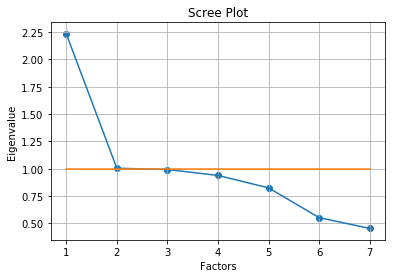

In [39]:
plt.scatter(range(1,bank_vs_agrobig.shape[1]+1),ev)
plt.plot(range(1,bank_vs_agrobig.shape[1]+1),ev)
plt.plot(range(1,bank_vs_agrobig.shape[1]+1),ev/ev) #the 1 eigenvalue line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [40]:
fact.loadings_

array([[ 0.73094058, -0.26130882, -0.12646241,  0.0189632 ,  0.03789715],
       [ 0.75524746,  0.12232537, -0.04893193,  0.15191704, -0.1208413 ],
       [ 0.6475832 , -0.10626866,  0.22832216, -0.10597887,  0.00943834],
       [ 0.35717725,  0.1733672 , -0.01612051, -0.21215722,  0.05815904],
       [ 0.28880473,  0.29645551, -0.13433172, -0.02770125,  0.04978555],
       [ 0.13211974,  0.17069622,  0.21771742,  0.14491532,  0.07615669],
       [ 0.05175402, -0.05139333, -0.05171812,  0.09015748,  0.23648816]])

### => Observation
#### In this example, two factors have eigenvalues over 1. We still see the 1st defining factor for banks. However, this time it's not really low for food industrials.
#### The 2nd factor is very similar between banks and food industrials, and it's somewhat significant.

## 3) Pharmaceuticals vs Food industrials

In [41]:
pharma_vs_agrobig=ret_data[["ADWYA","SIPHAT","UNIMED","SFBT","DELICE HOLDING","POULINA GP HOLDING"]]

In [42]:
fact.fit(pharma_vs_agrobig)
fact.get_eigenvalues()
ev,v= fact.get_eigenvalues()

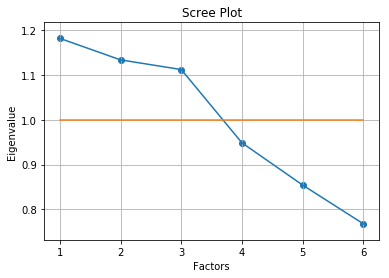

In [43]:
plt.scatter(range(1,pharma_vs_agrobig.shape[1]+1),ev)
plt.plot(range(1,pharma_vs_agrobig.shape[1]+1),ev)
plt.plot(range(1,pharma_vs_agrobig.shape[1]+1),ev/ev) #the 1 eigenvalue line
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [47]:
fact.loadings_

array([[-0.07295267,  0.31721805,  0.24687233,  0.09935027, -0.03426447],
       [ 0.1194163 , -0.12517288,  0.36395068,  0.02958578,  0.03521231],
       [ 0.48848756, -0.12649768, -0.10034283, -0.00487322, -0.0261804 ],
       [ 0.40177856,  0.29537435,  0.01513738,  0.01705759,  0.01966897],
       [-0.0418473 ,  0.27129263, -0.04882443, -0.20517528,  0.01068226],
       [-0.0559662 ,  0.13293905, -0.27587246,  0.16695889,  0.02450332]])

### => Observation and interpretation:
#### This time Factor 1 doesn't seem to have as much significance as we found in cases with banks. With means this 
#### There are 3 main underlying factors that we can use. The 1st one seems to has a smaller significance for bigger companies (Adwya, Poulina and Delice). 